In [6]:
import scipy as sc
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def create_data(n,xmax=10):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    #xmax = 10.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    #y = -x**2 + 1.5 * np.random.normal(size=len(x))
    return x, y

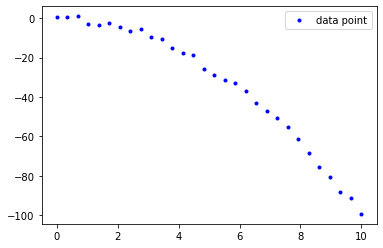

In [10]:
#main program
n = 30
x, y = create_data(n)
plt.plot(x, y, 'b.', label='data point')
plt.legend()

In [29]:
n_refine=10; #3, 15, 20
xfine = np.linspace(0.1, 9.9, n * n_refine)

In [30]:
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')
#interpolate with piecewise constant func (p=3)
y3=scipy.interpolate.interp1d(x, y, kind='cubic')

Text(0.5, 0, 'x')

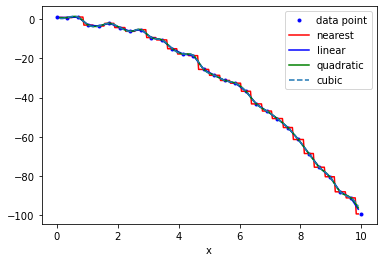

In [31]:
plt.plot(x, y, 'b.', label='data point')
plt.plot(xfine, y0(xfine), '-r', label='nearest')
plt.plot(xfine, y1(xfine), '-b', label='linear')
plt.plot(xfine, y2(xfine), '-g', label='quadratic')
plt.plot(xfine, y3(xfine), '--', label='cubic')
plt.legend()
plt.xlabel('x')

In [37]:
#Curve Fitting
from scipy.optimize import curve_fit

def f1(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

def f2(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    #return a * np.exp(- b * x^2) + c
    return a * np.sin(b*x) + c

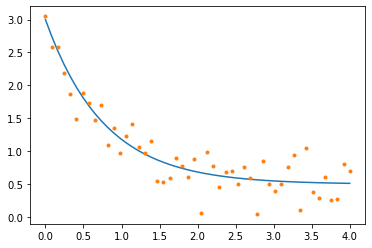

In [38]:
#create fake data
x = np.linspace(0, 4, 50)
y = f1(x, a=2.5, b=1.3, c=0.5)

#add noise
noise_amp=0.25; #0.01, 0.5
yi = y + noise_amp * np.random.normal(size=len(x))

plt.plot(x,y)
plt.plot(x,yi,'.')

In [39]:
#call curve fit function
popt, pcov = curve_fit(f1, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

Optimal parameters are a=2.39642, b=1.33918, and c=0.513204


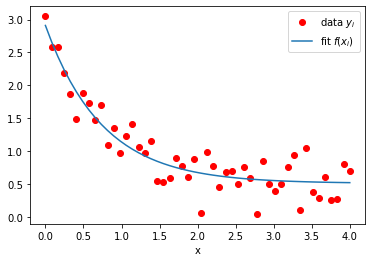

In [40]:
#plotting
yfitted = f1(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])

#plt.plot(x,y,'b-')
plt.plot(x, yi, 'ro', label='data $y_i$')
plt.plot(x, yfitted, '-', label='fit $f(x_i)$')
plt.xlabel('x')
plt.legend()